<a href="https://colab.research.google.com/github/alinysunderhus/Walmart_Sales_Deliverable2_DNCGroup/blob/main/Deliverable2_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identificação da Aluna
Aliny Pautz Sunderhus

RID: 38842

#1 - A Questão do Negócio

Fundado em 1962 no estado de Arkansas, sul dos Estados Unidos, por Sam Walton, o Walmart se tornou uma companhia multinacional, responsável por mudar os rumos do ramo varejista.

Os concorrentes de Sam não acreditavam em sua ideia de que um negócio de sucesso poderia ser construído em torno da oferta de preços mais baixos e um ótimo serviço. Como se viu, o sucesso da empresa superou até mesmo as expectativas de Sam. A empresa abriu seu capital em 1970, e os lucros financiaram uma expansão constante dos negócios.

Por meio da inovação, o Walmart buscar criar uma experiência que permiti que os clientes comprem a qualquer hora e em qualquer lugar online e nas lojas. Neste ano de 2022, o Walmart opera aproximadamente 10.500 lojas em 24 países e sites de comércio eletrônico, empregando 2,3 milhões de associados em todo o mundo – quase 1,6 milhão apenas nos EUA.

Maiores informações sobre a companhia podem ser encontradas [nesta página oficial do Walmart](https://corporate.walmart.com/about).

Este projeto faz parte dos requisitos para a conclusão do curso Data Expert da Escola DNC e se propõe a analisar um conjunto de dados de vendas de lojas do Walmart. 

Segundo a pessoa que disponibilizou o conjunto de dados, que aqui trataremos como o próprio cliente Walmart, a empresa está enfrentando um desafio devido a demandas imprevistas e algumas vezes fica sem estoque. Isso estaria relacionado às vendas durante os feriados.

A principal meta desta pesquisa será apontar em qual dessas lojas seria melhor fazer um investimento para expandir seu tamanho.

# 2 - Entendimento do Negócio

O Walmart é uma companhia varejista que atua tanto por meio de lojas físicas como por comércio online.

O dataset a ser utilizado neste projeto está disponível gratuitamente nesta página da comunidade Kaggle: https://www.kaggle.com/datasets/yasserh/walmart-dataset.

Os dados contemplam vendas realizadas entre 05/02/2010 e 01/11/2012 em 45 lojas físicas. Os atributos relacionados a cada venda são:

Atributo  | Descrição
-------------------|------------------
   *Store*    | identificador da loja
*Date*       | a semana de vendas
*Weekly_Sales*  | vendas naquela semana
*Holiday_Flag*  | marcador que diz se a semana possui ou não algum feriado. Recebe 0 em caso negativo e 1 caso haja feriado.
*Fuel_Price* | preço do combustível na região da loja
*CPI*  | índice de preços ao consumidor$^*$
*Unemployment* | taxa de desemprego

\
$^*$Índice de Preços ao Consumidor (CPI) mede as mudanças nos preços pagos pelos consumidores por uma cesta de bens e serviços.

\
O Walmart realiza vários eventos promocionais de descontos ao longo do ano. Essas remarcações precedem feriados importantes. Os quatro maiores são:


Feriado  | Datas
-------------------|------------------
*Super Bowl* |12-Fev-2010, 11-Fev-2011, 10-Fev-12, 8-Fev-13
Dia do trabalho | 10-Set-10, 9-Set-11, 7-Set-12, 6-Set-13
Dia de ação de graças | 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Natal | 31-Dez-10, 30-Dez-11, 28-Dez-12, 27-Dez-13

# 3 - Coleta dos Dados

## 3.1 - Importação das bibliotecas

In [1]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns

## 3.2 - Carregamento dos dados

In [2]:
# Carregando os dados

url = 'https://raw.githubusercontent.com/alinysunderhus/Walmart_Sales_Deliverable2_DNCGroup/main/Walmart.csv'
df = pd.read_csv(url)

## 3.3 - Análise inicial dos dados

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [5]:
# Verificando se há ocorrência valores nulos e o tipo de dado de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
# Verificando se há ocorrência de linhas duplicadas
df.duplicated().sum()

0

In [7]:
# Verificando medidas estatíticas 
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
# Verificando o número de valores únicos para o identificador das lojas
df['Store'].nunique()

45

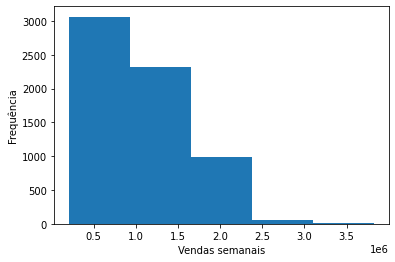

In [9]:
fig = plt.figure()
plt.hist(df['Weekly_Sales'], bins=5)
plt.xlabel('Vendas semanais')
plt.ylabel('Frequência');

A partir dessa análise inicial, percebe-se que:
* O conjunto de dados possui 6435 registros;
* não há valores nulos;
* os dados da coluna `date`deveriam ser do tipo *datetime*;
* para facilitar o entendimento da temperatura, é interessante converter esses dados de Fahrenheit para graus Celsius;
* não há linhas duplicadas;
* o conjunto de dados abrange as vendas de 45 lojas;
* há registros de feriado em outros meses, que não os informados pelo cliente. 


# 4 - Limpeza dos Dados

In [10]:
# Convertendo os dados da coluna 'date' para o tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
# Convertendo os dados da coluna 'Temperature' para °C:
# °C = (°F − 32) ÷ 1,8

df['Temperature'] = ((df['Temperature'] - 32)/1.8).round(2)
df.rename(columns={'Temperature' : 'Temperature_Celsius'}, inplace=True)

In [12]:
# Os valores de temperatura passem possíveis de acontecer
df['Temperature_Celsius'].describe()

count    6435.000000
mean       15.924331
std        10.247221
min       -18.920000
25%         8.590000
50%        17.040000
75%        23.855000
max        37.860000
Name: Temperature_Celsius, dtype: float64

# 5 - Exploração dos Dados

Esta etapa do projeto pretende responder as seguintes questões:

1. Qual atributo tem maior correlação com as vendas semanais?
2. Qual o preço médio de venda semanal por loja? 
3. Em quantas semanas as lojas ultrapassaram a média do período?
4. Quais lojas apresentaram as maires vendas acumuladas durante semanas de feriado?
5. Quais lojas apresentaram maior evolução de vendas semanais ao longo do período? 

\
As últimas 4 questões servirão como peneiras que selecionarão determinado número de lojas. A figura abaixo esquematiza o processo de escolha da loja que deverá receber o investimento.

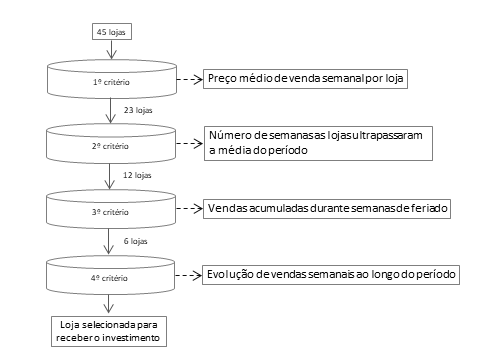

## 5.1 - Qual atributo tem maior correlação com as vendas semanais?

A correlação mede o grau em que dois fenômenos estão relacionados entre si.

Iremos calcular o coeficiente de correlação de Pearson, relacionando entre si as variáveis do conjunto de dados, com exceção do atributo `Date`.

Apesar da variável `Holiday_Flag` ser categórica, segundo Matos e Rodrigues (2019) a correlação de Pearson também pode ser estabelecida entre uma variável numérica e outra categórica binária, quando esta assume valores numéricos. Este é o caso da variável `Holiday_Flag`, que assume o valor 0 quando a semana não possui feriado, e o valor 1 quando há feriado naquela semana.

\
Referência: MATOS, Daniel Abud Seabra; RODRIGUES, Erica Castilho. Análise fatorial. 2019.


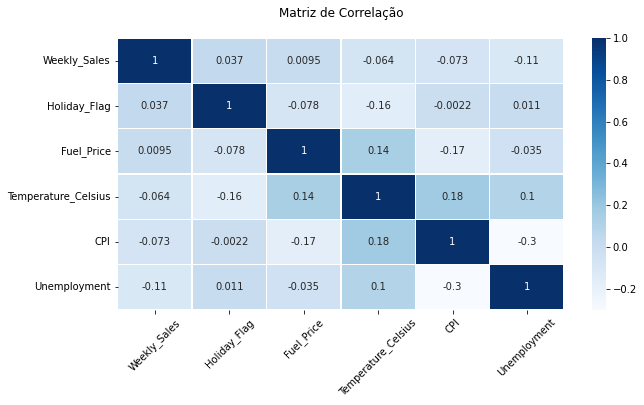

In [13]:
# Selecionando os atributos 
atributos = df[['Weekly_Sales', 'Holiday_Flag', 'Fuel_Price', 'Temperature_Celsius', 'CPI', 'Unemployment']]

plt.figure(figsize = (10,5))
correlation = sns.heatmap(atributos.corr(method='pearson'), cmap='Blues', linewidths=.5, annot=True)
correlation.set(title = "Matriz de Correlação\n")
plt.xticks(rotation=45);

plt.savefig('matriz_correlacao.png', format='png')

O atributo que tem maior correlação com as vendas semanais é a taxa de desemprego, apresentando uma correlação negativa de -0.11. 

O fato da correlação ser negativa faz sentido, pois espera-se que quanto maior a taxa de desemprego da região, menor o poder aquisitivo daquela população e, consequentemente, menor as vendas.

Entretanto, de acordo com Figueiredo Filho e Silva Júnior (2009), este valor de correlação ainda é considerado fraco. 

\
Referência: FIGUEIREDO FILHO, Dalson Britto; SILVA JÚNIOR, José Alexandre. Desvendando os Mistérios do Coeficiente de Correlação de Pearson (r). Revista Política Hoje, v. 18, n. 1, p. 115-146, 2009.

## 5.2 - Qual o preço médio de venda semanal por loja?

O preço médio de venda semanal por loja será nosso primeiro critério para decidir em qual loja o Walmart deve investir.
Das 45 lojas presentes no *dataframe*, selecionaremos metade das lojas (arredondando para cima, 23 lojas) que possuem maior média de venda semanal nesta primeira avaliação.

In [14]:
# Calculando o preço médio de vendas semanais e salvando as 23 primeiras em um novo Dataframe
df_precoMedio = df[['Store', 'Weekly_Sales']].groupby('Store').mean().sort_values(by=['Weekly_Sales'], ascending=False).reset_index().head(23)
df_precoMedio.rename(columns={'Weekly_Sales': 'Weekly_Sales_Mean'}, inplace=True)

# Salvando esse grupo de dados
df_precoMedio.to_csv('Weekly_Sales_Mean.csv')

#Exibindo a lista com as 23 lojas que apresentam maior preço média de vendas semanais:
df_precoMedio 

,Store,Weekly_Sales_Mean
0,20,2.107677e+06
1,4,2.094713e+06
2,14,2.020978e+06
3,13,2.003620e+06
4,2,1.925751e+06
5,10,1.899425e+06
6,27,1.775216e+06
7,6,1.564728e+06
8,1,1.555264e+06
9,39,1.450668e+06


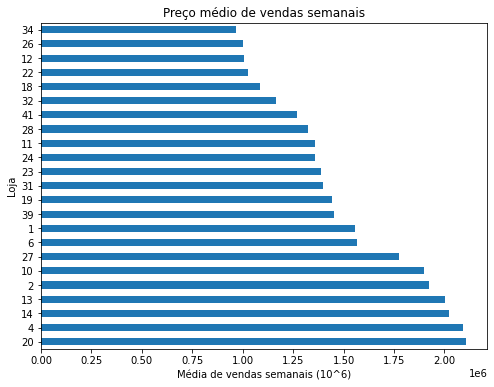

In [15]:
plt.rcParams["figure.figsize"] = (8,6)
df_precoMedio.plot(kind='barh',y='Weekly_Sales_Mean',x='Store', legend=False)
plt.title('Preço médio de vendas semanais')
plt.xlabel('Média de vendas semanais (10^6)')
plt.ylabel('Loja')
plt.savefig('filtro1.png', format='png');

## 5.3 - Em quantas semanas as lojas ultrapassaram a média do período?

O número de semanas cujas vendas semanais foram maiores que a média das vendas de cada loja será nosso segundo critério de decisão. Nesta avaliação, das 23 lojas filtradas na etapa anterior, selecionaremos metade das lojas (arredondando para cima, 12 lojas) que possuem a maior contagem de semanas que superaram a média semanal.

In [16]:
# Primeiramente, vamos criar um Dataframe para esse critério. 
# Ele será o 'df' acrescido da coluna 'Weekly_Sales_Mean' do df_precoMedio
df_countWeeks = df.merge(df_precoMedio, on='Store', how='left')

# Várias linhas do df_auxiliar possuem valores nulos na coluna 'Weekly_Sales_Mean', pois essa informação está disponível
# para apenas 23 lojas. Vamos remover essas linhas.
df_countWeeks.dropna(axis=0, inplace=True)

# Criando nova coluna chamada 'Count' que receberá True caso o valor de 'Weekly_Sales' for maior que 'Weekly_Sales_Mean
df_countWeeks['Count'] = (df_countWeeks['Weekly_Sales'] > df_countWeeks['Weekly_Sales_Mean']) 

# Agrupando os dados por loja e contando quantas vezes suas vendas semanais foram speriores sua média.
# Selecionando apenas as 12 primeiras neste critério.
df_countWeeks = df_countWeeks[['Store', 'Count']].groupby('Store').sum().sort_values(by='Count', ascending=False).reset_index().head(12)



In [17]:
# Salvando esse grupo de dados
df_countWeeks.to_csv('Count_Weeks.csv')

# Exibindo as 23 lojas selecionadas que apresentam maior número de semanas que superaram a média de venda semanal
df_countWeeks

,Store,Count
0,26,67
1,14,66
2,24,63
3,41,62
4,4,62
5,39,61
6,18,60
7,27,59
8,28,58
9,23,56


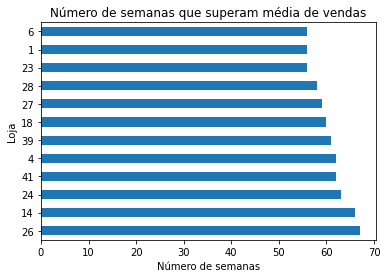

In [18]:
plt.rcParams["figure.figsize"] = (6,4)
df_countWeeks.plot(kind='barh',y='Count',x='Store', legend=False)
plt.title('Número de semanas que superam média de vendas')
plt.xlabel('Número de semanas')
plt.ylabel('Loja')
plt.savefig('filtro2.png', format='png');

## 5.4 -  Quais lojas apresentaram as maires vendas acumuladas durante semanas de feriado?

Neste quarto critério de avaliação, filtraremos a metade das lojas da etapa anterior que obtiveram maiores valores venda acumulados durante as semanas que tiveram feriado em todo o período de tempo, ou seja, de 05/02/2010 a 01/11/2012.

Apesar da matriz de correlação ter nos mostrado um baixo coeficiente de correlação entre as vendas semanais e o fato da semana ter ou não feriado, foi decido utilizar os feriados nessa métrica pois a questão dessas semanas especiais foi exposta pelo cliente.

In [19]:
# Criando um array com os identificadores das lojas selecionadas na etapa anterior
storeList = df_countWeeks['Store'].unique()

# Criando um novo dataframe para esse critério com os dados dessas lojas em que a semana teve feriado.
df_holiday = df[df['Store'].isin(storeList)][['Store', 'Weekly_Sales', 'Holiday_Flag']]
df_holiday = df_holiday[df_holiday['Holiday_Flag'] == 1][['Store', 'Weekly_Sales']]
df_holiday = df_holiday.groupby('Store').sum().sort_values(by='Weekly_Sales', ascending=False).reset_index().head(6)
df_holiday.rename(columns={'Weekly_Sales':'Holiday_Sales'}, inplace=True)

In [20]:
# Salvando esse grupo de dados
df_holiday.to_csv('Holiday.csv')

# Exibindo as 6 lojas selecionadas nesta etapa
df_holiday

,Store,Holiday_Sales
0,4,22431026.24
1,14,21205829.98
2,27,18922992.78
3,6,16809079.27
4,1,16657476.56
5,39,15511274.80


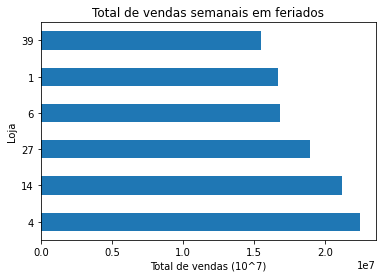

In [21]:
plt.rcParams["figure.figsize"] = (6,4)
df_holiday.plot(kind='barh',y='Holiday_Sales',x='Store', legend=False)
plt.title('Total de vendas semanais em feriados')
plt.xlabel('Total de vendas (10^7)')
plt.ylabel('Loja')
plt.savefig('filtro3.png', format='png');

## 5.5 - Quais lojas apresentaram maior evolução de vendas semanais ao longo do período? 

Para este último critério de avaliação, utilizaremos regressão linear para avaliar a evolução das vendas mensais ao longo do período disponível no conjunto de dados.

Por fim, a loja selecionada para receber um investimento de expansão será aquela que apresentar maior tendência de alta nas vendas semanais. Neste caso, a loja que apresentar maior coeficiente angular da equação da reta obtida na regressão linear.

In [22]:
# Criando um array com os identificadores das lojas selecionadas na etapa anterior
storeList2 = df_holiday['Store'].unique()

# Criando um novo dataframe para esse critério com os dados dessas lojas para as semanas sem feriado
df_salesEvolution = df[df['Store'].isin(storeList2)][['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag']]
df_salesEvolution = df_salesEvolution[df_salesEvolution['Holiday_Flag'] == 0][['Store', 'Date', 'Weekly_Sales']]
df_salesEvolution.head()

,Store,Date,Weekly_Sales
0,1,2010-05-02,1643690.90
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-05-03,1554806.68
5,1,2010-12-03,1439541.59


In [23]:
# Para trabalhar com regressão linear usando datas como variável independente, primeiro precisamos transformar as datas em número ordinal
df_salesEvolution['date_ordinal'] = pd.to_datetime(df_salesEvolution['Date']).apply(lambda date: date.toordinal())

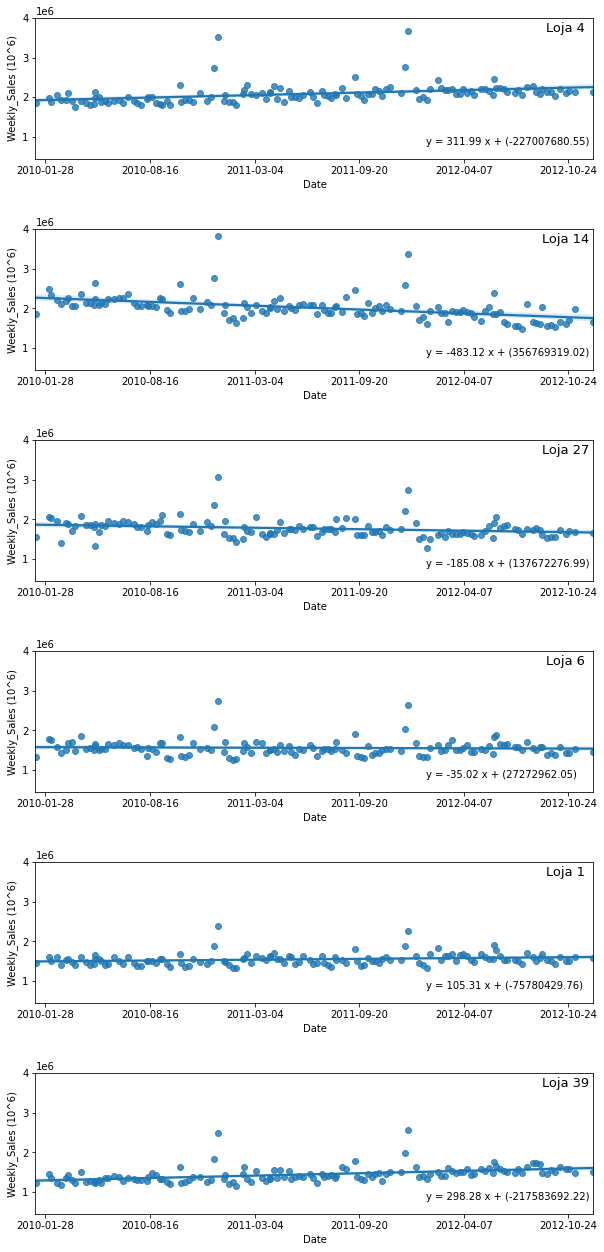

<Figure size 432x288 with 0 Axes>

In [32]:
contador = 1
plt.figure(figsize=(10,22));
plt.subplots_adjust(hspace = 0.5, wspace = 0.4);

for i in storeList2:
  plt.subplot(6, 1, contador)

  ax = sns.regplot(
      data=df_salesEvolution[df_salesEvolution['Store']==i],
      x='date_ordinal',
      y='Weekly_Sales')

  ax.set_xlim(df_salesEvolution['date_ordinal'].min() - 1, df_salesEvolution['date_ordinal'].max() + 1)
  ax.set_ylim(bottom=450000, top=4000000)

  # Equação da reta
  valoresx = df_salesEvolution[df_salesEvolution['Store']==i]['date_ordinal']
  valoresy = df_salesEvolution[df_salesEvolution['Store']==i]['Weekly_Sales']
  a, b = np. polyfit(valoresx, valoresy, 1)

  plt.text(0.7, 0.1, f'y = {a:.2f} x + ({b:.2f})', transform=ax.transAxes)


  ax.set_xlabel('Date')
  new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
  ax.set_xticklabels(new_labels)

  ax.set_ylabel('Weekly_Sales (10^6)')

  ax.set_title(f'Loja {i}', position=(0.95, 0.86), fontsize=13)
  contador += 1

plt.show();

plt.savefig('Lojas_regressao.png', format='png', dpi=1000);

## 5.6 - Escolha final da loja

A loja que passou pela maior evolução ao longo do tempo, apresentando maior coeficiente angular no último critério, é a loja 4, sendo essa a escolhida para receber investimento do Walmart.

In [33]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature_Celsius,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,5.73,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,3.62,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.41,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.13,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,8.06,2.625,211.350143,8.106


In [34]:
# Agrupando os detalhes da loja 4 em uma única tabela

df_loja4 = df.groupby('Store').sum().reset_index()[['Store', 'Weekly_Sales']].query('Store == 4')

df_loja4 = df_loja4.merge(df_precoMedio, on='Store', how='left')

min = df[df['Store']==4].min()['Weekly_Sales']
df_loja4['Menor venda semanal'] = min

max = df[df['Store']==4].max()['Weekly_Sales']
df_loja4['Maior venda semanal'] = max

df_loja4 = df_loja4.merge(df_countWeeks, on='Store', how='left')
df_loja4 = df_loja4.merge(df_holiday, on='Store', how='left')
df_loja4.rename(columns={'Store':'Loja', 'Weekly_Sales': 'Total vendas', 'Weekly_Sales_Mean':'Média vendas semanais',
                         'Count': 'Semanas acima da média', 'Holiday_Sales':'Total vendas em feriados'}, inplace=True)


In [35]:
df_loja4

,Loja,Total vendas,Média vendas semanais,Menor venda semanal,Maior venda semanal,Semanas acima da média,Total vendas em feriados
0,4,2.995440e+08,2.094713e+06,1762539.3,3676388.98,62,22431026.24


In [36]:
df_loja4.to_csv('Loja4.csv')